In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('fampay_instagram_data.csv')

In [3]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['shortcode'],
    y=df['num_likes'],
    name='Likes',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=df['shortcode'],
    y=df['num_comments'],
    name='Comments',
    marker_color='red'
))

fig.update_layout(
    title='Number of Likes and Comments for Each Post',
    xaxis_title='Shortcode',
    yaxis_title='Count',
    barmode='group'
)

fig.show()

In [4]:
df.sort_values(by=['num_likes'], ascending=False).head(5)

,shortcode,caption,upload_time,num_likes,num_comments,is_video,video_views,url
27,CppyqFOJBST,remember at the end of the day: aaaall is well 🫶,2023-03-11 20:36:50+05:30,340994,1229,True,1529684.0,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....
50,CoU1ezXp6Vl,when you like this 🥳\nwhen you share this 🕺💃,2023-02-06 20:43:22+05:30,64208,360,False,NaN,https://instagram.fixm4-1.fna.fbcdn.net/v/t51....
58,CoAQ-AFS7ov,"forget them, they’re hissstory 🤭",2023-01-29 20:59:31+05:30,42345,536,False,NaN,https://instagram.fixm4-1.fna.fbcdn.net/v/t51....
13,CqlAroZpQqL,30k likes and we reveal the next steps 🔎,2023-04-03 20:31:53+05:30,39785,1160,False,NaN,https://instagram.fixm4-3.fna.fbcdn.net/v/t51....
62,CnzYTO5JA3V,get us 35k likes on this post and we’ll asli m...,2023-01-24 20:53:27+05:30,35241,1320,False,NaN,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....


In [5]:
df.sort_values(by=['num_comments'], ascending=False).head(5)

,shortcode,caption,upload_time,num_likes,num_comments,is_video,video_views,url
146,CjIeMonJuBw,Every 20th comment wins FREE Google Play Redee...,2022-09-30 18:52:03+05:30,13685,21103,False,NaN,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....
248,CdgGuTvpmMz,Spam the comments with a 👟 emoji and two of y’...,2022-05-13 20:01:58+05:30,3171,17966,True,20959.0,https://instagram.fixm4-3.fna.fbcdn.net/v/t51....
204,CfeFCYWJieZ,Free. Google. Play. Recharge. Codes.,2022-07-01 18:09:55+05:30,16572,15486,False,NaN,https://instagram.fixm4-2.fna.fbcdn.net/v/t51....
75,CnE9GLAKryp,drop the last 2 digits of your phone number to...,2023-01-06 20:14:04+05:30,31366,13720,True,184392.0,https://instagram.fixm4-1.fna.fbcdn.net/v/t51....
197,CgCSy47pA-G,"Tag a friend and if they reply in 2 mins, both...",2022-07-15 19:42:48+05:30,12455,12545,False,NaN,https://instagram.fixm4-3.fna.fbcdn.net/v/t51....


In [6]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['num_likes'],
    y=df['num_comments'],
    mode='markers',
    marker=dict(
        color='blue',
        size=10
    ),
    name='Likes vs. Comments'
))

fig.update_layout(
    title='Likes vs. Comments for Each Post',
    xaxis_title='Number of Likes',
    yaxis_title='Number of Comments'
)

fig.show()

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['upload_time'],
    y=df['num_likes'],
    mode='lines',
    name='Likes'
))

fig.add_trace(go.Scatter(
    x=df['upload_time'],
    y=df['num_comments'],
    mode='lines',
    name='Comments'
))

fig.update_layout(
    title='Number of Interactions Over Time',
    xaxis_title='Upload Time',
    yaxis_title='Number of Interactions'
)

fig.show()

In [8]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df['num_likes'],
    name='Likes',
    marker=dict(
        color='blue',
        opacity=0.5
    ),
    xbins=dict(
        start=min(df['num_likes']),
        end=max(df['num_likes']),
        size=int((max(df['num_likes'])-min(df['num_likes']))/20)
    ),
))

fig.add_trace(go.Histogram(
    x=df['num_comments'],
    name='Comments',
    marker=dict(
        color='red',
        opacity=0.5
    ),
    xbins=dict(
        start=min(df['num_comments']),
        end=max(df['num_comments']),
        size=int((max(df['num_comments'])-min(df['num_comments']))/20)
    ),
))

fig.update_layout(
    title='Frequency Distribution of Number of Interactions',
    xaxis_title='Number of Interactions',
    yaxis_title='Frequency'
)

fig.show()

In [11]:
df['upload_time'] = pd.to_datetime(df['upload_time'])
df['hour'] = df['upload_time'].dt.hour
df['day_of_week'] = df['upload_time'].dt.dayofweek

heatmap_data = df.pivot_table(index='hour', columns='day_of_week', values='num_likes', aggfunc=np.mean)

fig = go.Figure()

fig.add_trace(go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Blues'
))

fig.update_layout(
    title='Average Number of Likes by Hour of Day and Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Hour of Day'
)

fig.show()

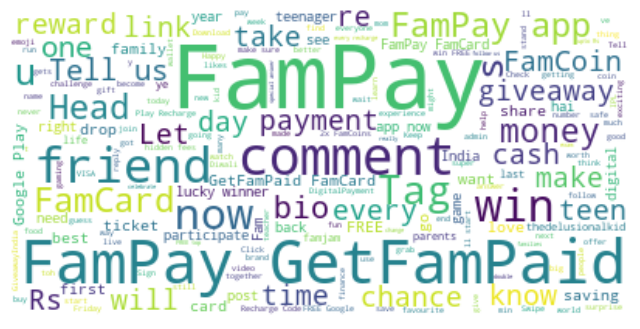

In [15]:
text = ' '.join(df['caption'].fillna('').tolist())
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
interaction_counts = df.groupby('is_video').agg({'num_likes': 'sum', 'num_comments': 'sum'})

fig = go.Figure()

fig.add_trace(go.Bar(
    x=interaction_counts.index.astype(str),
    y=interaction_counts['num_likes'],
    name='Likes'
))

fig.add_trace(go.Bar(
    x=interaction_counts.index.astype(str),
    y=interaction_counts['num_comments'],
    name='Comments'
))

fig.update_layout(
    title='Number of Interactions by Video vs. Non-Video Posts',
    xaxis_title='Is Video?',
    yaxis_title='Number of Interactions',
    barmode='stack'
)

fig.show()

In [14]:
interaction_means = df.groupby(['is_video', pd.Grouper(key='upload_time', freq='D')]).mean()[['num_likes', 'num_comments']]
interaction_means = interaction_means.reset_index()
interaction_means['is_video'] = interaction_means['is_video'].apply(lambda x: 'Video' if x else 'Non-Video')

fig = go.Figure()

for post_type in interaction_means['is_video'].unique():
    fig.add_trace(go.Scatter(
        x=interaction_means.loc[interaction_means['is_video']==post_type, 'upload_time'],
        y=interaction_means.loc[interaction_means['is_video']==post_type, 'num_likes'],
        mode='lines',
        name=f'{post_type} Likes'
    ))

    fig.add_trace(go.Scatter(
        x=interaction_means.loc[interaction_means['is_video']==post_type, 'upload_time'],
        y=interaction_means.loc[interaction_means['is_video']==post_type, 'num_comments'],
        mode='lines',
        name=f'{post_type} Comments'
    ))

fig.update_layout(
    title='Average Number of Interactions by Video vs. Non-Video Posts Over Time',
    xaxis_title='Upload Time',
    yaxis_title='Average Number of Interactions'
)

fig.show()

C:\Users\Harsh Clean\AppData\Local\Temp\ipykernel_20684\3874424280.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

